# <font color='#2B17B0'>CIENCIA DE DATOS APLICADA A FINANZAS</font>
Sesión 7, 2023-10-23/24<br>
Carlos Crespo Elizondo<br>
EGADE BUSINESS SCHOOL

# <font color='#2B17B0'>Librerías a utilizar en clases</font>

In [2]:
from matplotlib.patches import FancyArrow
from matplotlib.patches import Circle
import matplotlib.pyplot as plt
import herramientas_financieras as hf
import pandas as pd
import numpy as np
import itertools
import seaborn as sns


# sns.set_style('darkgrid')

In [9]:
%load_ext autoreload
%autoreload 2

# <font color='#2B17B0'>Previo a empezar la clase:</font>

1. _Leer los componentes del IPC directamente del archivo de Excel de la página de BMV/S&P IPC (desarrollarlo en otra libreta)_
    * _Link: https://www.spglobal.com/spdji/en/indices/equity/sp-bmv-ipc/#overview_
1. _Mejorar la función precios para que pueda leer los precios de una o varias emisoras_
    1. Incluir:
        1. docstring
        1. parámetros preestablecidos (accion=IPC, fecha2= la fecha de hoy y fecha1= hoy hace un año
    * **_NOTA: Actualmente la función puede leer solo una emisora_**

# <font color='#2B17B0'>Portafolios de Inversión</font>

## <font color='#2B17B0'>Retornos y volatilidad de 2 activos</font>

In [3]:
df_2activos = pd.DataFrame({
    "rojo":{'ret':.04, 'sigma':.2},
    "azul":{'ret':.12, 'sigma':.3}})
df_2activos

,rojo,azul
ret,0.04,0.12
sigma,0.20,0.30


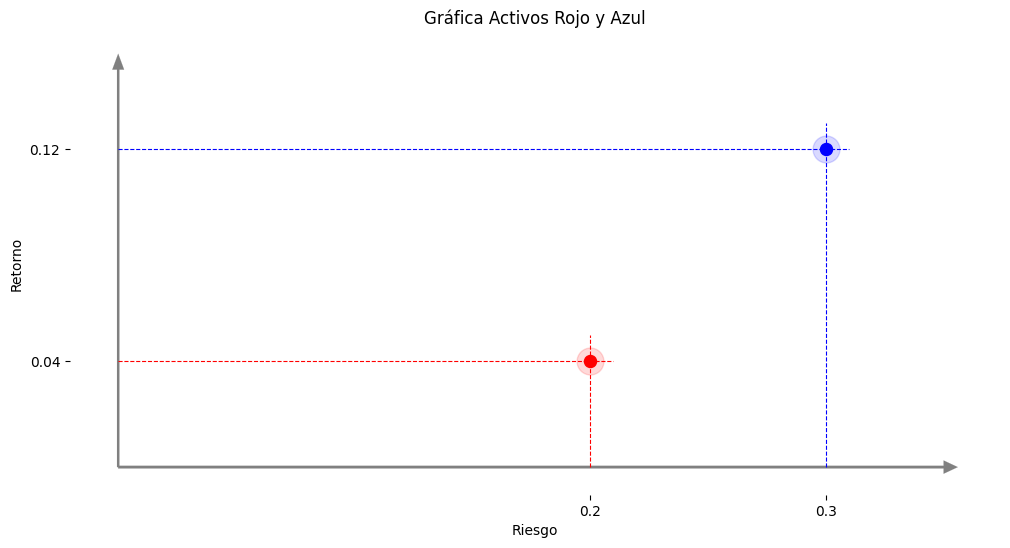

In [4]:
hf.fig_2activos(df_2activos)

### Portafolio compuesto por 50% <font color='blue'>activo azul</font> y 50% <font color='red'>activo rojo</font>

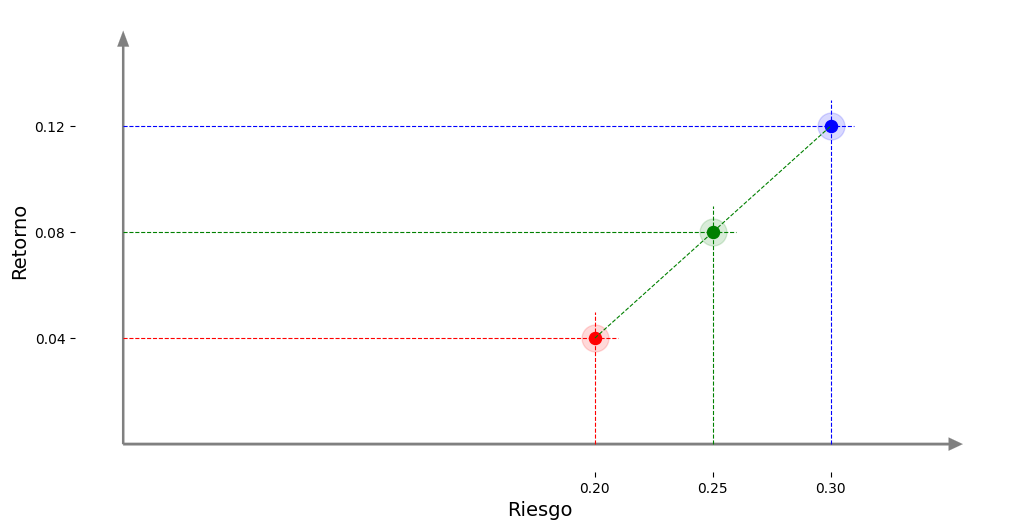

In [5]:
hf.fig_pregunta(df_2activos)

### Cálculo del retorno de un portafolio de 2 activos

$$\Large R_{w_A, w_B}=w_A*R_A + w_B*R_B$$

### Cálculo de la volatilidad de un portafolio de 2 activos (fórmula teórica)

$$\Large \sigma^2_{w_A, w_B}=\sigma^2_{A}w^2_{A}+\sigma^2_{B}w^2_{B}+2w_Aw_B\sigma_A\sigma_B\rho_{A,B}$$

$$\Large \sigma_{w_a, w_b}=\sqrt{\sigma^2_{w_A, w_B}}$$

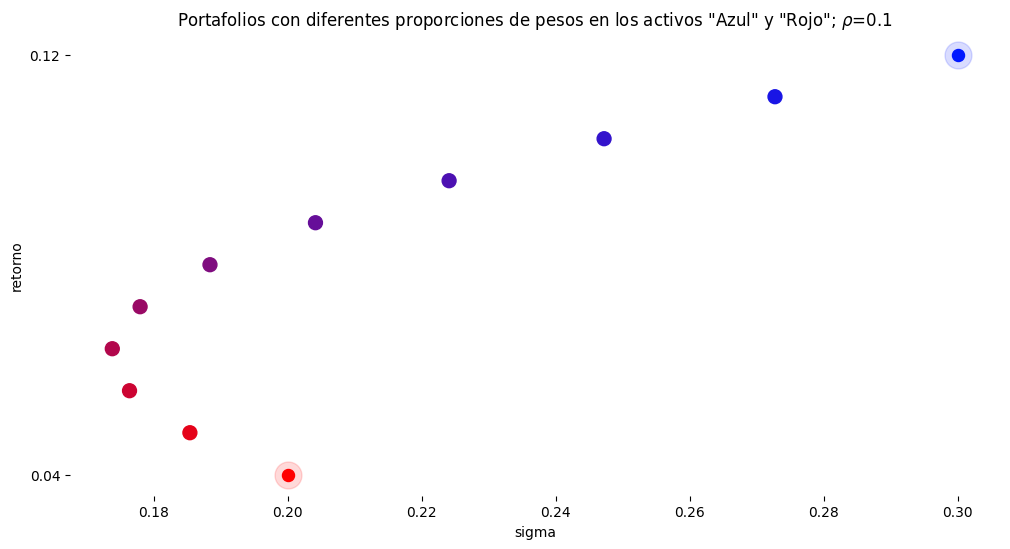

In [7]:
hf.fig_portafolio(df_2activos, .1)

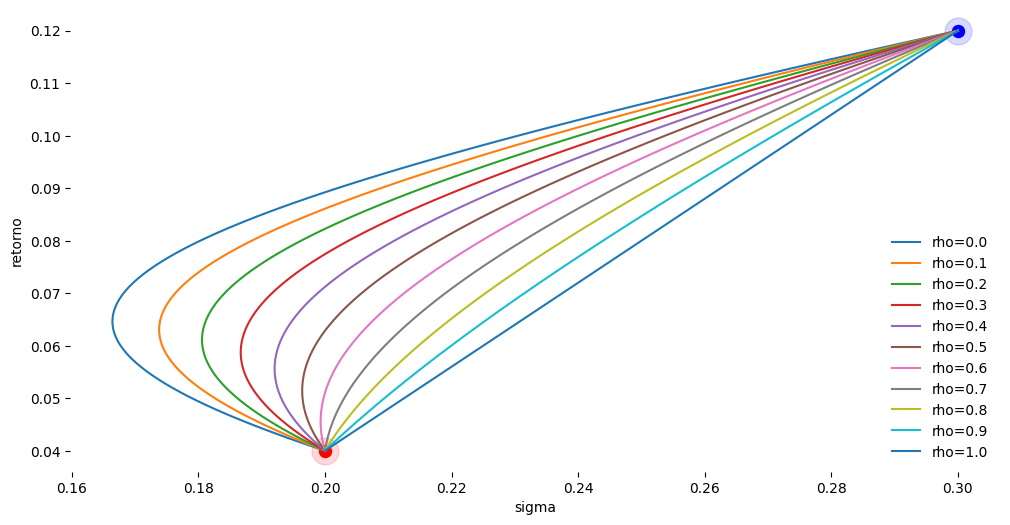

In [8]:
hf.fig_port_dif_correlacion(df_2activos)

In [45]:
acciones = hf.ipc(formato_yf=False)

In [46]:
acciones

['alfaa',
 'alsea',
 'amxb',
 'ac',
 'bbajioo',
 'cuervo',
 'bolsaa',
 'cemexcpo',
 'kofubl',
 'volara',
 'vesta',
 'femsaubd',
 'labb',
 'gentera',
 'grumab',
 'omab',
 'gapb',
 'asurb',
 'bimboa',
 'gcarsoa1',
 'gcc',
 'chdrauib',
 'elektra',
 'gfnorteo',
 'gfinburo',
 'gmexicob',
 'tlevisacpo',
 'pe&oles',
 'kimbera',
 'megacpo',
 'orbia',
 'pinfra',
 'q',
 'ra',
 'walmex']

In [32]:
precios.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 962 entries, 2020-01-02 to 2023-10-20
Data columns (total 36 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ^MXX        962 non-null    float64
 1   alfaa       961 non-null    float64
 2   alsea       961 non-null    float64
 3   amxb        961 non-null    float64
 4   ac          961 non-null    float64
 5   bbajioo     961 non-null    float64
 6   cuervo      961 non-null    float64
 7   bolsaa      961 non-null    float64
 8   cemexcpo    961 non-null    float64
 9   kofubl      961 non-null    float64
 10  volara      961 non-null    float64
 11  vesta       961 non-null    float64
 12  femsaubd    961 non-null    float64
 13  labb        961 non-null    float64
 14  gentera     961 non-null    float64
 15  grumab      961 non-null    float64
 16  omab        961 non-null    float64
 17  gapb        961 non-null    float64
 18  asurb       961 non-null    float64
 19  bimboa    

In [33]:
sns.set_style('darkgrid')

## <font color='#2B17B0'>Construir portafolios utilizando Simulación MonteCarlo</font>

Para el desarrollo del primer portafolio de inversión, vamos a seguir los siguiente pasos:

1. Importar librerías
1. Importar precios de cierre
1. Calcular retornos diarios y anuales
1. Calcular $\sigma$ diaria y anual
1. Graficar dispersiones de los retornos anuales Vs $\sigma$ anual
1. Seleccionar de manera cuantitativa las acciones que formaran el portafolio (Sharp Ratio)
1. Calcular matriz de covarianza  de las acciones seleccionadas
1. Crear array NumPy para guardar los resultados de las simulaciones.
1. Realizar simulación Monte Carlo
1. Visualizar portafolio
1. Visualizar resultados óptimos

### <font color='royalblue'>2. Importar precios de cierre</font>

In [30]:
precios = hf.precios(hf.ipc(), fecha1='2020-01-01', fecha2='2023-10-23')
precios

,^MXX,alfaa,alsea,amxb,ac,bbajioo,cuervo,bolsaa,cemexcpo,kofubl,...,gmexicob,tlevisacpo,pe&oles,kimbera,megacpo,orbia,pinfra,q,ra,walmex
fecha,,,,,,,,,,,,,,,,,,,,,
2020-01-02,44437.230469,16.034735,51.480000,13.484959,86.612564,24.091406,33.562588,35.012287,7.16,89.070732,...,43.602520,43.503357,206.533569,31.189491,64.760582,37.246906,167.944412,67.919655,92.159554,52.371120
2020-01-03,44624.851563,16.233185,51.889999,13.890388,87.385803,24.300896,33.495544,34.276733,7.19,89.795563,...,43.707550,43.599754,210.751602,31.173109,64.718788,37.813698,170.947983,67.766411,91.488747,51.962574
2020-01-06,44495.300781,16.406828,51.895000,13.749368,87.058678,24.188671,33.596115,34.113281,7.20,89.271217,...,42.677475,42.862324,212.450806,31.369637,64.827469,37.777718,169.057938,68.677345,91.685799,52.518398
2020-01-07,44157.808594,16.004967,51.869999,13.749368,87.878647,24.113850,33.438072,34.358467,7.07,88.939636,...,42.770382,42.018864,212.130951,32.393177,62.954948,36.392200,169.855774,69.111519,91.136581,52.238110
2020-01-08,44470.910156,16.312565,51.599998,13.987338,87.589752,23.896879,33.428490,34.456539,7.20,88.530945,...,43.917603,42.481560,209.901993,33.850708,62.378147,36.005337,174.429413,67.791954,92.620728,52.931702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-16,49823.078125,10.920000,61.919998,15.300000,151.490005,55.250000,40.000000,32.950001,11.55,134.020004,...,77.320000,10.230000,209.229996,33.450001,38.000000,36.740002,156.710007,137.990005,131.789993,60.869999
2023-10-17,49666.011719,10.920000,62.189999,15.390000,155.210007,54.860001,40.330002,32.470001,11.54,134.960007,...,77.099998,9.450000,209.649994,35.060001,38.009998,36.570000,158.500000,136.440002,130.770004,60.070000
2023-10-18,49274.781250,10.990000,61.509998,14.920000,156.690002,57.139999,39.610001,28.950001,11.14,132.440002,...,76.250000,9.440000,208.520004,35.150002,37.459999,36.959999,158.110001,137.279999,127.389999,60.310001


### <font color='royalblue'>3. Calcular retornos diarios y anuales</font>

#### Retornos diarios

In [36]:
retornos = np.log(precios/precios.shift(1))
retornos.dropna(inplace=True)
retornos

,^MXX,alfaa,alsea,amxb,ac,bbajioo,cuervo,bolsaa,cemexcpo,kofubl,...,gmexicob,tlevisacpo,pe&oles,kimbera,megacpo,orbia,pinfra,q,ra,walmex
fecha,,,,,,,,,,,,,,,,,,,,,
2020-01-03,0.004213,0.012300,0.007933,0.029622,0.008888,0.008658,-0.002000,-0.021232,0.004181,0.008105,...,0.002406,0.002213,0.020217,-0.000525,-0.000646,0.015103,0.017726,-0.002259,-0.007305,-0.007832
2020-01-06,-0.002907,0.010640,0.000096,-0.010204,-0.003750,-0.004629,0.002998,-0.004780,0.001390,-0.005856,...,-0.023850,-0.017058,0.008030,0.006285,0.001678,-0.000952,-0.011118,0.013353,0.002152,0.010640
2020-01-07,-0.007614,-0.024798,-0.000482,0.000000,0.009375,-0.003098,-0.004715,0.007162,-0.018221,-0.003721,...,0.002175,-0.019875,-0.001507,0.032107,-0.029310,-0.037365,0.004708,0.006302,-0.006008,-0.005351
2020-01-08,0.007065,0.019037,-0.005219,0.017160,-0.003293,-0.009038,-0.000287,0.002850,0.018221,-0.004606,...,0.026469,0.010951,-0.010563,0.044012,-0.009204,-0.010687,0.026570,-0.019278,0.016154,0.013190
2020-01-09,0.002274,-0.002436,-0.000872,0.000000,-0.005838,-0.011335,-0.009067,-0.001424,-0.013986,-0.004758,...,-0.001104,-0.008660,-0.016178,-0.017201,-0.002684,-0.001000,-0.010005,0.021308,0.007396,-0.002516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-16,0.008941,0.011050,0.014969,0.011173,0.007554,0.002174,0.011820,0.012214,0.036143,0.010200,...,0.005187,0.024741,0.031559,0.016883,-0.004726,0.045380,-0.003376,0.003848,-0.002879,0.015563
2023-10-17,-0.003157,0.000000,0.004351,0.005865,0.024259,-0.007084,0.008216,-0.014675,-0.000866,0.006989,...,-0.002849,-0.079310,0.002005,0.047009,0.000263,-0.004638,0.011358,-0.011296,-0.007770,-0.013230
2023-10-18,-0.007908,0.006390,-0.010994,-0.031015,0.009490,0.040720,-0.018014,-0.114746,-0.035277,-0.018849,...,-0.011086,-0.001059,-0.005404,0.002564,-0.014576,0.010608,-0.002464,0.006138,-0.026187,0.003987


In [37]:
retornos_promedios = retornos.mean()
retornos_promedios

^MXX          0.000095
alfaa        -0.000379
alsea         0.000153
amxb          0.000134
ac            0.000584
bbajioo       0.000935
cuervo        0.000206
bolsaa       -0.000180
cemexcpo      0.000453
kofubl        0.000360
volara       -0.000506
vesta         0.000537
femsaubd      0.000069
labb         -0.000150
gentera       0.000088
grumab        0.000502
omab          0.000359
gapb          0.000178
asurb         0.000158
bimboa        0.000840
gcarsoa1      0.000640
gcc           0.000493
chdrauib      0.001416
elektra      -0.000156
gfnorteo      0.000613
gfinburo      0.000407
gmexicob      0.000531
tlevisacpo   -0.001647
pe&oles      -0.000062
kimbera       0.000061
megacpo      -0.000629
orbia         0.000019
pinfra       -0.000146
q             0.000725
ra            0.000362
walmex        0.000106
dtype: float64

#### Retornos anualizados

In [38]:
retornos_anuales = retornos_promedios * 252
retornos_anuales

^MXX          0.023819
alfaa        -0.095630
alsea         0.038473
amxb          0.033869
ac            0.147152
bbajioo       0.235628
cuervo        0.051877
bolsaa       -0.045464
cemexcpo      0.114154
kofubl        0.090786
volara       -0.127625
vesta         0.135437
femsaubd      0.017445
labb         -0.037856
gentera       0.022115
grumab        0.126478
omab          0.090363
gapb          0.044892
asurb         0.039903
bimboa        0.211712
gcarsoa1      0.161290
gcc           0.124182
chdrauib      0.356818
elektra      -0.039424
gfnorteo      0.154369
gfinburo      0.102445
gmexicob      0.133820
tlevisacpo   -0.415147
pe&oles      -0.015671
kimbera       0.015288
megacpo      -0.158409
orbia         0.004835
pinfra       -0.036788
q             0.182677
ra            0.091313
walmex        0.026764
dtype: float64

### <font color='royalblue'>4. Calcular $\sigma$ diaria y anual</font>

In [39]:
sigma = retornos.std()
sigma

^MXX          0.011381
alfaa         0.026311
alsea         0.027636
amxb          0.017110
ac            0.014138
bbajioo       0.022246
cuervo        0.017937
bolsaa        0.020137
cemexcpo      0.027203
kofubl        0.015146
volara        0.035243
vesta         0.017541
femsaubd      0.016423
labb          0.021983
gentera       0.029149
grumab        0.017664
omab          0.025952
gapb          0.025976
asurb         0.021741
bimboa        0.021963
gcarsoa1      0.024900
gcc           0.018657
chdrauib      0.018988
elektra       0.011436
gfnorteo      0.024114
gfinburo      0.023408
gmexicob      0.025294
tlevisacpo    0.028328
pe&oles       0.029968
kimbera       0.018461
megacpo       0.018653
orbia         0.022587
pinfra        0.017413
q             0.019588
ra            0.024699
walmex        0.016418
dtype: float64

#### Sigma anual

In [40]:
sigma_anual = sigma * np.sqrt(252)
sigma_anual


^MXX          0.180674
alfaa         0.417672
alsea         0.438704
amxb          0.271619
ac            0.224429
bbajioo       0.353148
cuervo        0.284746
bolsaa        0.319664
cemexcpo      0.431833
kofubl        0.240442
volara        0.559465
vesta         0.278463
femsaubd      0.260702
labb          0.348965
gentera       0.462734
grumab        0.280406
omab          0.411978
gapb          0.412359
asurb         0.345122
bimboa        0.348655
gcarsoa1      0.395278
gcc           0.296164
chdrauib      0.301432
elektra       0.181538
gfnorteo      0.382803
gfinburo      0.371584
gmexicob      0.401534
tlevisacpo    0.449691
pe&oles       0.475733
kimbera       0.293061
megacpo       0.296101
orbia         0.358565
pinfra        0.276425
q             0.310955
ra            0.392086
walmex        0.260629
dtype: float64

### <font color='royalblue'>5. Graficar dispersiones de los retornos anuales Vs $\sigma$ anual</font>

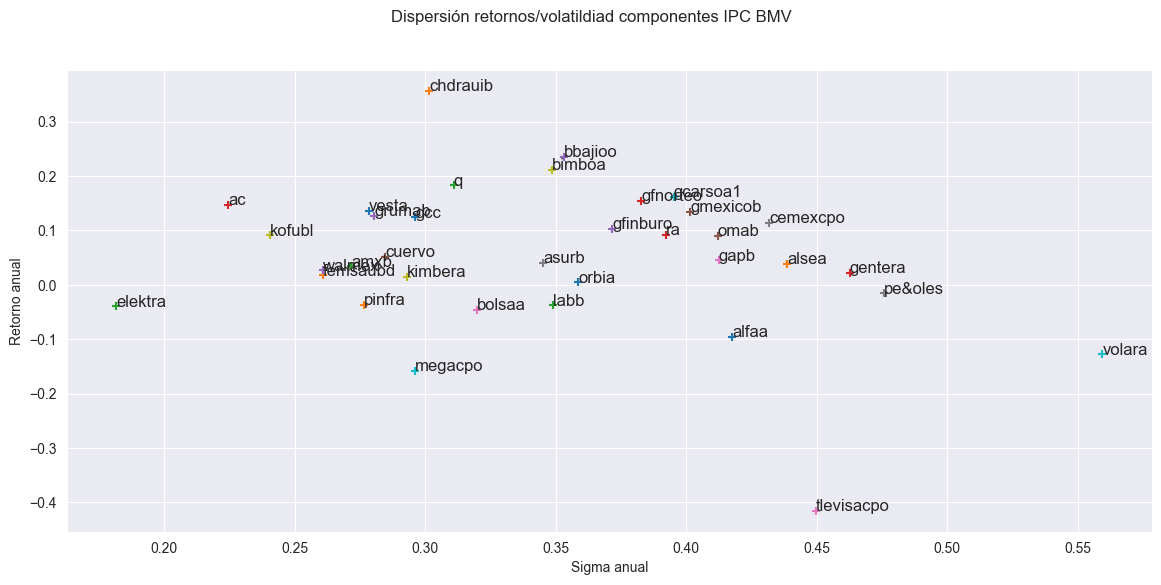

In [48]:
plt.figure(figsize=(14,6))
plt.suptitle('Dispersión retornos/volatildiad componentes IPC BMV')

plt.xlabel('Sigma anual')
plt.ylabel('Retorno anual')

for accion in acciones:
    plt.scatter(sigma_anual[accion], retornos_anuales[accion], marker = '+')
    plt.text(sigma_anual[accion], retornos_anuales[accion], accion, fontsize=12)

### <font color='royalblue'>6. Seleccionar de manera cuantitativa las acciones que formaran el portafolio</font>

#### Sharpe Ratio
El Sharp Ratio, mide el rendimiento adicional que genera un activo por encima de la tasa de retorno libre de riesgo, ajustado por su volatilidad.<br><br>
$$SharpRatio = \frac{r_x - r_f}{\sigma_x}$$<br>
Como tasa libre de riesgo utilizaremos CETES a 28 dias $\approx11\%$ anual.

In [50]:
rf = .11

sharp = ((retornos_anuales - rf)/sigma_anual).sort_values(ascending=False)
sharp

chdrauib      0.818816
bbajioo       0.355738
bimboa        0.291727
q             0.233723
ac            0.165539
gcarsoa1      0.129758
gfnorteo      0.115906
vesta         0.091350
gmexicob      0.059323
grumab        0.058765
gcc           0.047885
cemexcpo      0.009620
gfinburo     -0.020333
ra           -0.047660
omab         -0.047666
kofubl       -0.079913
gapb         -0.157891
alsea        -0.163042
gentera      -0.189926
asurb        -0.203107
cuervo       -0.204122
pe&oles      -0.264163
amxb         -0.280288
orbia        -0.293293
walmex       -0.319367
kimbera      -0.323183
femsaubd     -0.355022
labb         -0.423698
volara       -0.424735
^MXX         -0.476999
bolsaa       -0.486335
alfaa        -0.492323
pinfra       -0.531021
elektra      -0.823102
megacpo      -0.906478
tlevisacpo   -1.167797
dtype: float64

In [55]:
sharp_corte = .2

acciones_portafolio = sharp[sharp > sharp_corte]
acciones_portafolio

chdrauib    0.818816
bbajioo     0.355738
bimboa      0.291727
q           0.233723
dtype: float64

In [56]:
nombre_acciones = list(acciones_portafolio.index)
numero_accion = len(nombre_acciones)

In [57]:
nombre_acciones

['chdrauib', 'bbajioo', 'bimboa', 'q']

In [58]:
numero_accion

4

### <font color='royalblue'>7. Calcular matriz de covarianza  de las acciones seleccionadas</font>

In [59]:
retornos[nombre_acciones]

,chdrauib,bbajioo,bimboa,q
fecha,,,,
2020-01-03,-0.024532,0.008658,0.000283,-0.002259
2020-01-06,-0.008252,-0.004629,0.004373,0.013353
2020-01-07,-0.004244,-0.003098,-0.013461,0.006302
2020-01-08,0.005900,-0.009038,-0.000856,-0.019278
2020-01-09,0.014236,-0.011335,0.022866,0.021308
...,...,...,...,...
2023-10-16,0.009820,0.002174,0.004974,0.003848
2023-10-17,-0.009341,-0.007084,-0.001783,-0.011296
2023-10-18,-0.002685,0.040720,-0.011278,0.006138


In [60]:
matriz_cov = retornos[nombre_acciones].cov()
matriz_cov

,chdrauib,bbajioo,bimboa,q
chdrauib,0.000361,0.000068,0.000085,0.000033
bbajioo,0.000068,0.000495,0.000085,0.000093
bimboa,0.000085,0.000085,0.000482,0.000056
q,0.000033,0.000093,0.000056,0.000384


### <font color='royalblue'>8. Crear array NumPy para guardar los resultados de las simulaciones</font>
Incluir las siguientes columnas:
1. \# de simulación
  1. Retorno generado
  1. $\sigma$ del portafolio
  1. Sharp Ratio del portafolio
  1. y el peso (w) de cada acción que forman el portafolio

In [88]:
numero_simulaciones = 80000
simulacion = np.zeros((numero_simulaciones, 4 + numero_accion))

In [89]:
simulacion.shape

(80000, 8)

### <font color='royalblue'>9. Realizar simulación Monte Carlo</font>

### <font color='gray'>Cálculo $E(R_p)$, $\sigma^2$ de un portafolio</font>
Para calcular el retorno de un portafolio de *"n"* activos:<br>
$E(R_p) = \displaystyle\sum_{i=1}^{n}{w_iE(R_i)}\implies Rw$<br><br>
Para calcular la $\sigma^2$ de un portafolio de dos activos -Recordar que la nombre como fórmula teórica-:<br>
$\sigma_p^2 = w_1^2\sigma_1^2 + w_2^2\sigma_2^2 + 2w_1w_2\sigma_1\sigma_2\rho_{12}$<br><br>
Recordememos que la fórmula de la correlación es:<br><br>
$\large\rho=\frac{Cov_{i,j}}{\sigma_i \sigma_j}$<br><br>
Podemos simplificar la fórmula de la varianza eliminando sustituyendo la fórmula de la $\rho$ y simplificándola a:<br><br>
$\sigma_p^2 = w_1^2\sigma_1^2 + w_2^2\sigma_2^2 + 2w_1w_2\sigma_1\sigma_2\frac{Cov_{1,2}}{\sigma_1 \sigma_2}\implies \sigma_p^2 = w_1^2\sigma_1^2 + w_2^2\sigma_2^2 + 2w_1w_2\sigma_{1,2}$<br><br>
Para calcular la $\sigma^2$ de un portafolio de *"n"* activos:<br>
$$
\begin{array}{rcl}
\sigma_p^2 & = & \displaystyle\sum_{i=1}^{n} {w_i^2\sigma_i^2} +  \displaystyle\sum_{i=1}^{n} \displaystyle\sum_{j\neq i}^{n}w_iw_j\sigma_i\sigma_j\rho_{ij}\\
& = & \displaystyle\sum_{i=1}^{n} \displaystyle\sum_{j=i}^{n}w_iw_j\sigma_{i,j}\\
& = & w^T\sum w 
\end{array}
$$
Donde $\sum$ es la matriz de varianza - covarianza

In [90]:
w = np.random.random(numero_accion)
w = w/w.sum()

In [91]:
w

array([0.29093886, 0.24314011, 0.3354403 , 0.13048073])

In [92]:
matriz_cov

,chdrauib,bbajioo,bimboa,q
chdrauib,0.000361,0.000068,0.000085,0.000033
bbajioo,0.000068,0.000495,0.000085,0.000093
bimboa,0.000085,0.000085,0.000482,0.000056
q,0.000033,0.000093,0.000056,0.000384


In [93]:
for i in range(numero_simulaciones):
    
    #Cálculo de los pesos
    w = np.random.random(numero_accion)
    w = w/w.sum()
    
    retorno_portafolio = np.sum(retornos_anuales[nombre_acciones] * w)
    varianza_portafolio = np.dot(w.T, np.dot(matriz_cov, w))
    sigma_portafolio = np.sqrt(varianza_portafolio) * np.sqrt(252)
    sharp_portafolio = (retorno_portafolio - rf) / sigma_portafolio
    
    simulacion[i, 0] = i + 1
    simulacion[i, 1] = retorno_portafolio
    simulacion[i, 2] = sigma_portafolio
    simulacion[i, 3] = sharp_portafolio
    for j in range(len(w)):
        simulacion[i, j+4] = w[j]

In [94]:
resultados = pd.DataFrame(simulacion)
resultados

,0,1,2,3,4,5,6,7
0,1.0,0.229101,0.207131,0.575001,0.146362,0.221828,0.316508,0.315302
1,2.0,0.248065,0.198075,0.697033,0.283035,0.180069,0.226094,0.310801
2,3.0,0.251471,0.207227,0.682683,0.275801,0.200577,0.349388,0.174234
3,4.0,0.258569,0.198233,0.749469,0.361351,0.142101,0.187420,0.309128
4,5.0,0.237386,0.214191,0.594731,0.160759,0.318746,0.338770,0.181725
...,...,...,...,...,...,...,...,...
79995,79996.0,0.279179,0.230059,0.735373,0.405951,0.457360,0.054820,0.081868
79996,79997.0,0.237799,0.201100,0.635497,0.220105,0.208775,0.197596,0.373524
79997,79998.0,0.227581,0.211477,0.555997,0.194404,0.112015,0.176285,0.517295
79998,79999.0,0.232019,0.207263,0.588718,0.151063,0.283586,0.276207,0.289145


### <font color='gray'>Renombrar columnas</font>

In [95]:
nombre_columnas = ['# simulacion', 'Ret', 'Sigma', 'Sharp'] + nombre_acciones
nombre_columnas

['# simulacion', 'Ret', 'Sigma', 'Sharp', 'chdrauib', 'bbajioo', 'bimboa', 'q']

In [96]:
resultados.columns = nombre_columnas
resultados

,# simulacion,Ret,Sigma,Sharp,chdrauib,bbajioo,bimboa,q
0,1.0,0.229101,0.207131,0.575001,0.146362,0.221828,0.316508,0.315302
1,2.0,0.248065,0.198075,0.697033,0.283035,0.180069,0.226094,0.310801
2,3.0,0.251471,0.207227,0.682683,0.275801,0.200577,0.349388,0.174234
3,4.0,0.258569,0.198233,0.749469,0.361351,0.142101,0.187420,0.309128
4,5.0,0.237386,0.214191,0.594731,0.160759,0.318746,0.338770,0.181725
...,...,...,...,...,...,...,...,...
79995,79996.0,0.279179,0.230059,0.735373,0.405951,0.457360,0.054820,0.081868
79996,79997.0,0.237799,0.201100,0.635497,0.220105,0.208775,0.197596,0.373524
79997,79998.0,0.227581,0.211477,0.555997,0.194404,0.112015,0.176285,0.517295
79998,79999.0,0.232019,0.207263,0.588718,0.151063,0.283586,0.276207,0.289145


### <font color='gray'>Identificar portafolio con el máximo Sharp Ratio y el de mínima varianza </font>

In [97]:
max_sharp_ratio = resultados.iloc[resultados['Sharp'].idxmax()]
max_sharp_ratio

# simulacion    32930.000000
Ret                 0.313349
Sigma               0.235987
Sharp               0.861695
chdrauib            0.692123
bbajioo             0.151653
bimboa              0.072845
q                   0.083378
Name: 32929, dtype: float64

In [98]:
min_vol = resultados.iloc[resultados['Sigma'].idxmin()]
min_vol

# simulacion    13795.000000
Ret                 0.253334
Sigma               0.197586
Sharp               0.725426
chdrauib            0.319031
bbajioo             0.175822
bimboa              0.199425
q                   0.305721
Name: 13794, dtype: float64

### <font color='royalblue'>10. Visualizar portafolio</font>

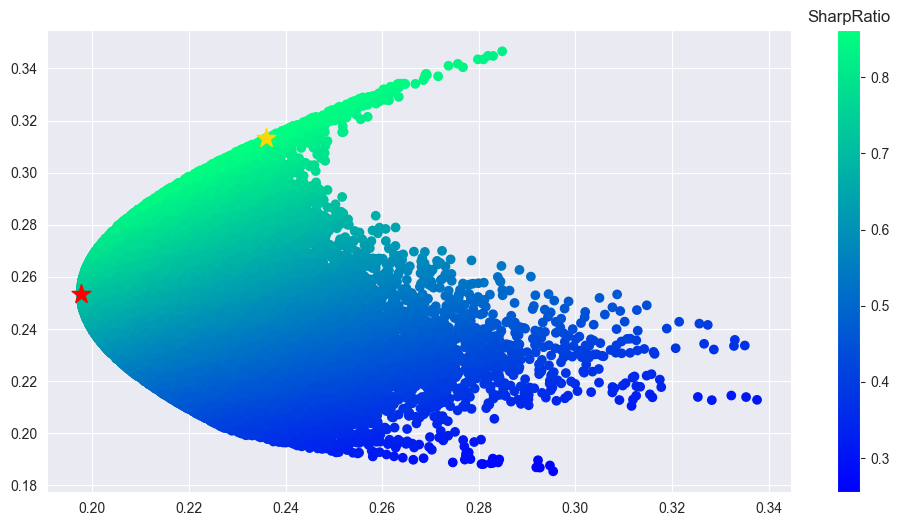

In [100]:
plt.figure(figsize=(12,6))
plt.scatter(x=resultados.Sigma.values, y=resultados['Ret'].values, c=resultados.Sharp, cmap='winter', label='simulacion')

clb = plt.colorbar()
clb.ax.set_title('SharpRatio')

plt.scatter(max_sharp_ratio[2], max_sharp_ratio[1], marker='*', color='gold', s=200, label='Port.Max Sharp Ratio')


plt.scatter(min_vol[2], min_vol[1], marker='*', color='r', s=200, label='Port.Min Volatilidad')